# NLP Hands-on : Twitter `US` Airline Sentiment Prediction_22Feb

## Objective: To classify the `sentiment of tweets` into one of the `three` categories: Positive, Negative, Neutral

- Source: `Twitter` -- coming from a project on Kaggle
- Description - Passengers' tweets about airline performance, having sentiments about their journey

# **Learning Outcomes**:
- Text based Exploratory Data Analysis
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Tune & Evaluate the Model performance.
- Plot the  important features after training the model.

In [ ]:
# !pip install contractions

In [ ]:
import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup


import numpy as np
import pandas as pd
import nltk                   ## Import Natural Language Tool-kit


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import os

In [ ]:
os.getcwd()

'C:\\Users\\thesi\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\03. AI and DL IITR-01Sep2024'

In [ ]:
data = pd.read_csv("Tweets.csv")

In [ ]:
data.sample(2).T

,14576,8599
tweet_id,569596652622721024,568127434173878272
airline_sentiment,negative,neutral
airline_sentiment_confidence,1.0,0.6786
negativereason,Late Flight,NaN
negativereason_confidence,1.0,NaN
airline,American,Delta
airline_sentiment_gold,NaN,NaN
name,billyrobbinscsp,MeganAurea
negativereason_gold,NaN,NaN
retweet_count,0,0


### Identifying the missing values

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

### Let us do some amazing EDA - Exploratory Data Analysis

`Percentage of Tweets` by Airline companies

In [ ]:
import seaborn as sns

C:\Users\thesi\AppData\Local\Temp\ipykernel_12616\1016768219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x='airline', palette = 'Paired')


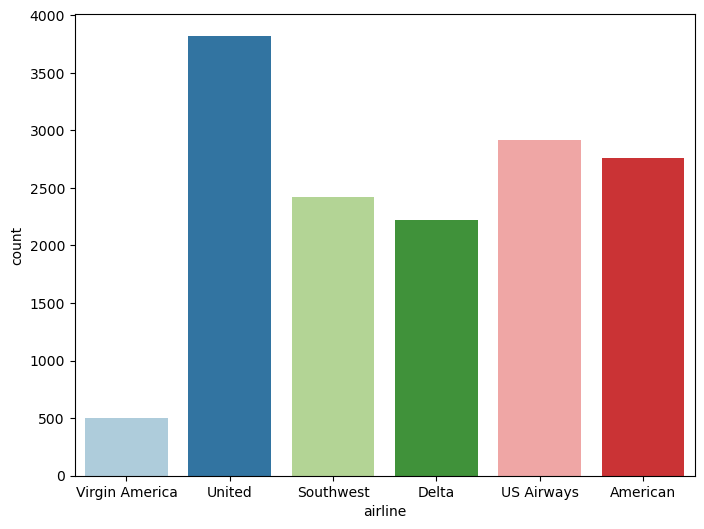

In [ ]:
plt.subplots(figsize = (8,6))

sns.countplot(data = data, x='airline', palette = 'Paired')
plt.show()

In [ ]:
print("Total number of tweets:", data['text'].count())

Total number of tweets: 14640


### Task: Can you show the `%age` distribution on top of the bar(s)

#### - We can see the percentage of tweets for `United Airlines` has the highest number of tweets ~ 26%, followed by `US Airways` (20%)

### `Distribution of Sentiments` across all the tweets

C:\Users\thesi\AppData\Local\Temp\ipykernel_12616\4038570650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x='airline_sentiment', palette = 'Paired')


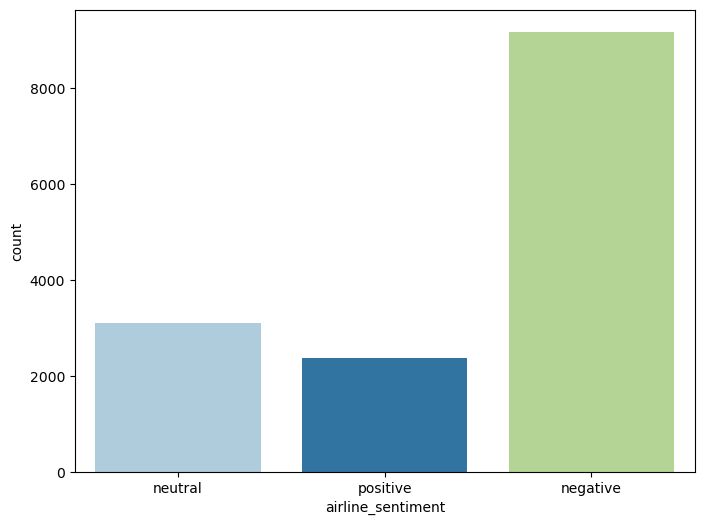

In [ ]:
plt.subplots(figsize = (8,6))
sns.countplot(data = data, x='airline_sentiment', palette = 'Paired')
plt.show()

### Let us see some `negative` sentiments

In [ ]:
sel_neg = data['airline_sentiment']=='negative'
data[sel_neg]['text'].sample(5).tolist()

['@united your website is a complete joke when using safari!',
 '@united Pay for a cab back to the airport to show baggage dept. my wet shirts and suit is not a viable option. 2nd time this has happened!!',
 "@USAirways Credit to my bank account for the two days of work that I've missed because of these Cancelled Flightlations.",
 "@USAirways it was your fault the flight was delayed to begin with. I shouldn't have to check my bag if there's a bunch of space",
 '@AmericanAir I was rebooked on a flight that was too Late Flight for my connection!']

In [ ]:
sel_pos = data['airline_sentiment']=='positive'
data[sel_pos]['text'].sample(5).tolist()

["@united Great! I'm ready to go home.",
 '@JetBlue it was booked through work but added upgrade on seat. Need the upgrade receipt.',
 '@JetBlue thanks!',
 '@JetBlue OH YEAH!!! great flight down to Mexico with a wonderful crew!! Thank you!!',
 ".@AmericanAir @TyWinter it's really the small things--the details--that make an excellent experience or a really irritating one."]

#####
- Majority of tweets are `negative` as expected (63%), followed by neutral tweets (21%), and then the positive tweets (16%)
- It's common for people to get`Twitter` and rant about the bad `customer service`

### Distribution of `Sentiment of Tweets` for each airline

In [ ]:
airline_sentiment_grp = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack().reset_index()

In [ ]:
airline_sentiment_grp

airline_sentiment,airline,negative,neutral,positive
0,American,1960,463,336
1,Delta,955,723,544
2,Southwest,1186,664,570
3,US Airways,2263,381,269
4,United,2633,697,492
5,Virgin America,181,171,152


### Task: Show it as `row % distribution`

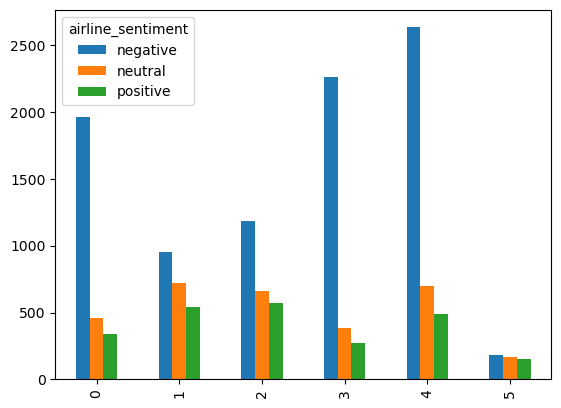

In [ ]:
airline_sentiment_grp.plot(kind='bar')
plt.show()

- It is evident from the output that for almost all the airlines, the majority of the tweets are `negative`, followed by `neutral` and `positive` tweets

- `Virgin America` is probably the only airline where the ratio of the three sentiment groups is `somewhat similar`

### Let us deep dive on the `negative reasons`

C:\Users\thesi\AppData\Local\Temp\ipykernel_12616\4262256548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x='negativereason', palette = 'Paired')


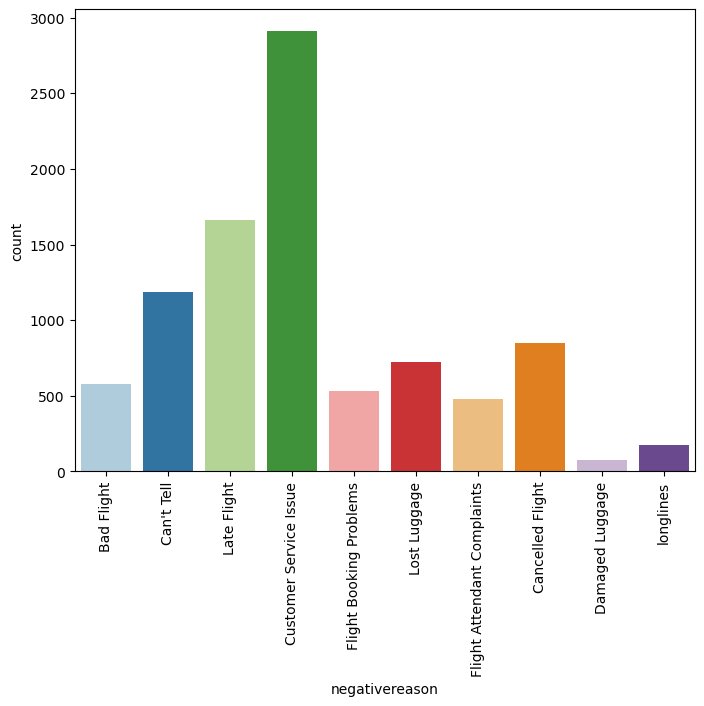

In [ ]:
plt.subplots(figsize = (8,6))
sns.countplot(data = data, x='negativereason', palette = 'Paired')
### Rotate the x-ticks labels
plt.xticks(rotation = 90)
plt.show()

- **`Customer Service` is the top reason for negative sentiments**

### Let us start with `word cloud` for `negative tweets`

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
neg_df = data[data['airline_sentiment']=='negative'] #filtered for negative sentiments
words = ' '.join(neg_df['text']) # combines all the tweets (stored in the column 'text') into a single string where each tweet is joined with others' tweets

In [ ]:
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

### Cleaning the combined string - leveraging `list comprehension`

In [ ]:
cleaned_text = " ".join([word for word in words.split() #splitting the words string into indiviual words based on whitespace
                         if 'http' not in word #exclude any word that contains "http"
                         and not word.startswith('@') #exclude words which start with "@" symbol
                         and word != "RT" # excludes "RT"
                        ])


In [ ]:
cleaned_text

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS, #exclude common stopwords
                      background_color = 'white',
                      width = 3000,
                      height = 2500).generate(cleaned_text)

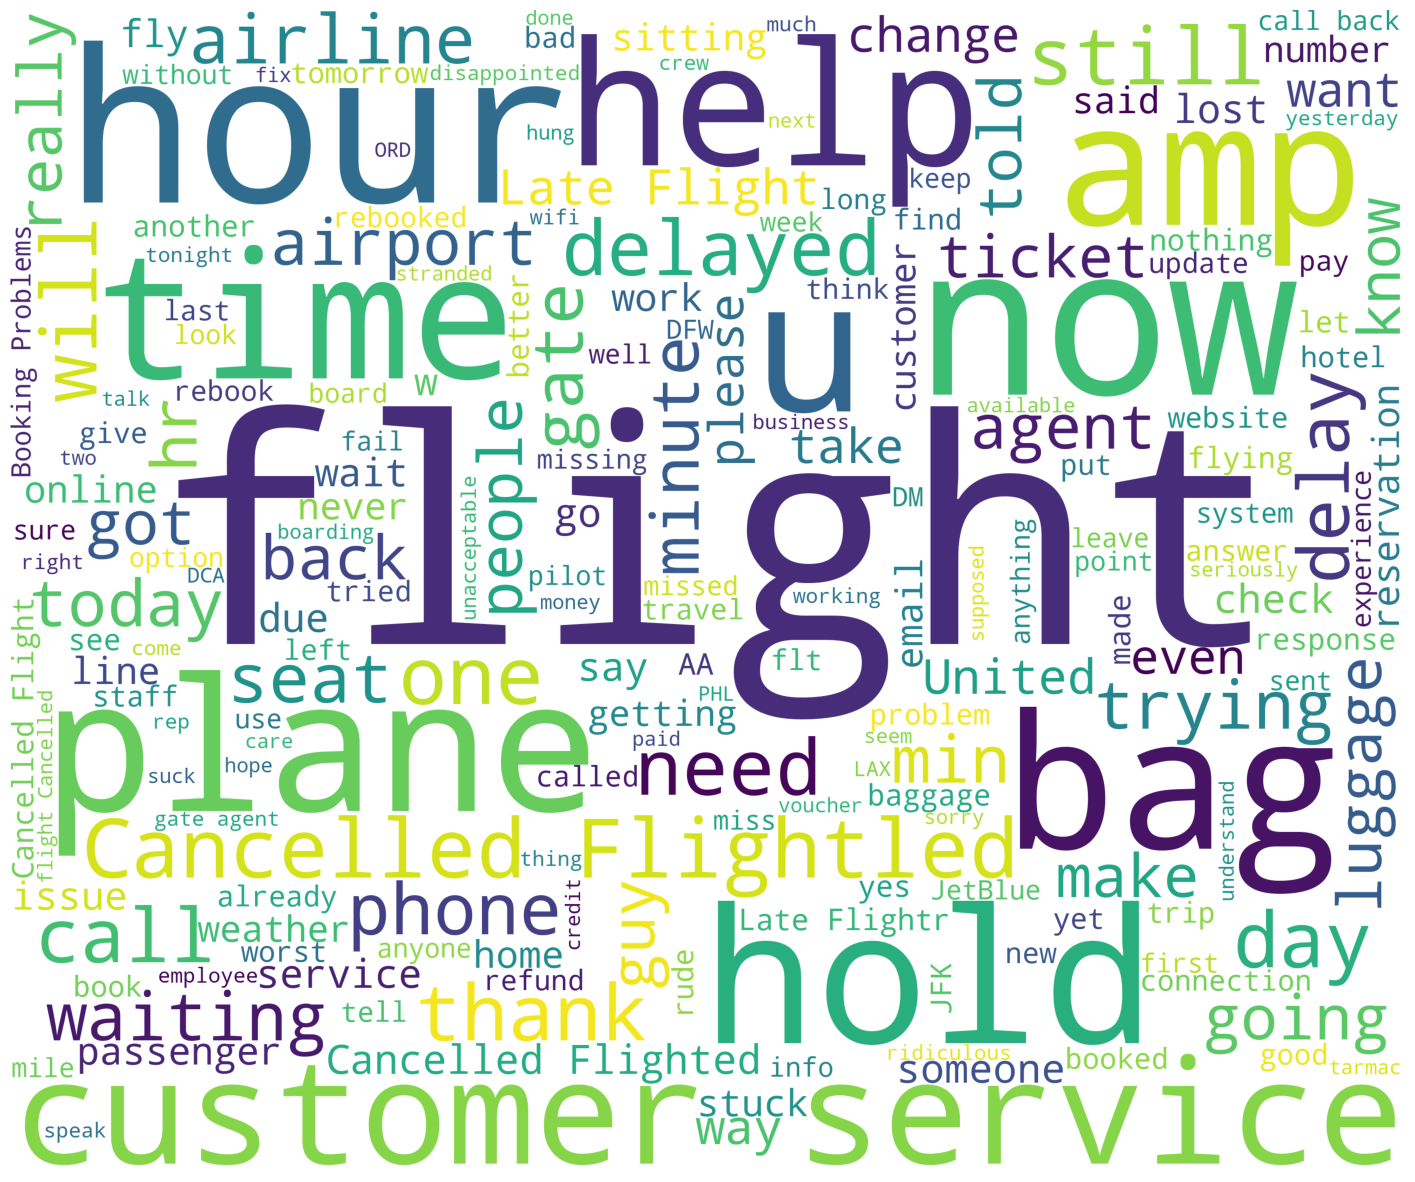

In [ ]:
plt.subplots(figsize = (18,18))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### TASK - Plot wordcloud for `positive tweets` too

Link for NLTK webpage : https://www.nltk.org/

### Data Preprocessing Steps

    - Remove html tags
    - Replace contractions in strings (e.g., replace I'm --> I am)
    - Remove numbers
    - Tokenization
    - To remove stopwords
    - Lemmatized the data

In [ ]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

### Remove `html` tags

https://www.geeksforgeeks.org/html-tags-a-to-z-list/#:~:text=HTML%20Tags%20are%20fundamental%20elements%20used%20to,browsers%20on%20how%20to%20render%20text%2C%20images

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x:strip_html(x)) #lambda function takes the html tags and passes to strip_html function to remove the html tags

C:\Users\thesi\AppData\Local\Temp\ipykernel_12616\1442181198.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
sample_tags = pd.DataFrame({'text': ['<h1>Hello, World!</h1>']})

In [ ]:
sample_tags

,text
0,"<h1>Hello, World!</h1>"


In [ ]:
sample_tags['text'] = sample_tags['text'].apply(lambda x : strip_html(x))

In [ ]:
sample_tags

,text
0,"Hello, World!"


`BeautifulSoup Link:` https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Replace contractions in string (e.g., replace I'm --> I am)

In [ ]:
def replace_contractions(text):

    '''
    replace contractions in the string

    '''
    return contractions.fix(text)


In [ ]:
data['text'] = data['text'].apply(lambda x:replace_contractions(x))

In [ ]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, Length: 14640, dtype: object

![image.png](attachment:3c933f85-08ba-4362-b39f-ade1fc7b621d.png)

## Remove Numbers

In [ ]:
def remove_numbers(text):

    text = re.sub(r'\d+', '', text)
    return text

`\d` --> matches any digits `[0-9]`

`+` --> means one or more of the preceding character --> `\d+` matches one or more digits

##### re.sub(pattern, replacement, string): This function replaces `occurrences of a pattern` in the given string with a `replacement string`.

In [ ]:
data['text'].tail(5)

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, dtype: object

In [ ]:
data['text'] = data['text'].apply(lambda x: remove_numbers(x))

In [ ]:
data['text'].tail(5)

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, dtype: object

### To remove stopwords

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

### Below is the list of `custom words` which we want to keep

In [ ]:
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
stopwords = list(set(stopwords) - set(customlist))

In [ ]:
stopwords

['them',
 "they've",
 'themselves',
 'these',
 'who',
 'our',
 'do',
 "you're",
 'his',
 'were',
 "you'll",
 'further',
 'herself',
 'but',
 'how',
 'or',
 're',
 'this',
 "it's",
 'doing',
 'until',
 'yourselves',
 "that'll",
 'me',
 'so',
 'up',
 'theirs',
 "i'd",
 "he's",
 'my',
 'itself',
 's',
 'are',
 'in',
 'more',
 "we'd",
 'now',
 'while',
 'and',
 'whom',
 'out',
 'll',
 "she'd",
 'some',
 'm',
 "i'll",
 'their',
 "they're",
 'from',
 'd',
 "she'll",
 'between',
 "should've",
 'having',
 'too',
 'yours',
 'himself',
 'to',
 'if',
 'both',
 'very',
 'i',
 "they'll",
 'because',
 'under',
 'through',
 'after',
 'as',
 'above',
 'he',
 'have',
 'which',
 'of',
 "you'd",
 'be',
 'can',
 'it',
 'she',
 "you've",
 'am',
 'during',
 'same',
 'being',
 'just',
 'before',
 "don't",
 "they'd",
 'own',
 'with',
 'should',
 'we',
 'couldn',
 'on',
 'all',
 'did',
 'nor',
 'here',
 "it'd",
 'myself',
 'again',
 't',
 'what',
 'you',
 'they',
 'no',
 'don',
 'other',
 'a',
 'any',
 'the',


In [ ]:
def remove_stopwords(words):
    '''
    remove stopwords using the list of tokenized words
    '''
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [ ]:
def remove_punctuation(words):

    '''
    remove punctuation from the list of tokenized words

    '''
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [ ]:
def to_lowercase(words):
    '''
    convert all characters to lowercase from the list of tokenized words

    '''
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


### `TOKENIZATION, LEMMATIZATION & WORD2VEC` ---> `MODEL BUILDING`
#### `RNN - we'll start`

In [ ]:
data['text'].sample(5).tolist()

['@USAirways yes had to go pick up and pay  cab ride very rude employee poor customer service',
 '@usairways sadly they have tried that and airport agents…no flights so they are stranded at PHL. No chance of a hotel for them?',
 '@USAirways #ShoutOut  Kristie(sp?) from Gate @ PVD today. She is a #RockStar, was a tremendous help in a tough situation. #PromoteThatGirl',
 '@JetBlue @lopezlaymari what a patronizing response to a legitimate issue',
 '@SouthwestAir much respect!']

## TOKENIZATION

- It is process of `splitting text into smaller units` called as tokens such as sentences, words, subwords and even characters

1. ***Word Tokenization*** --> Splitting text into individual words

In [ ]:
import nltk
nltk.download('punkt_tab') # to download the tokenizer models
# nltk.download('all')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
sample_text = " Hello! How are you doing today?"
print(sample_text)

 Hello! How are you doing today?


In [ ]:
tokens = word_tokenize(sample_text)

In [ ]:
print('Word tokens:', tokens)

Word tokens: ['Hello', '!', 'How', 'are', 'you', 'doing', 'today', '?']


In [ ]:
pip install spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") # small-sized english language model

ModuleNotFoundError: No module named 'spacy'

2. ***Sentence Tokenization*** --> Splitting text into sentences

In [ ]:
sample_text = " Hello! How are you doing today? I hope you're doing well."
print(sample_text)

 Hello! How are you doing today? I hope you're doing well.


In [ ]:
sentences = sent_tokenize(sample_text)

In [ ]:
print('Sentence tokens:', sentences)

Sentence tokens: [' Hello!', 'How are you doing today?', "I hope you're doing well."]


In [ ]:
type(sentences)

list

### LEMMATIZATION

- It is the process of `reducing words to their dictionary root form (lemma)` while preserving the meaning

In [ ]:
from nltk.stem import WordNetLemmatizer # Used to perform lemmatization
from nltk.corpus import wordnet

nltk.download('wordnet') # NLTK resource for lemmatization
nltk.download('omw-1.4') #Open Multilingual Wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
### Initialize the lemmatizer
lemmatizer = WordNetLemmatizer() # creates an instance of WordnetLemmatizer

### Convert `NLTK POS tags` to WordNet POS Tags

In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) #default to NOUN

In [ ]:
### Example words
words = ["running", "quickly", "better", "cats", "putting", "went", "making", "distracting", "studying"]

In [ ]:
words

['running',
 'quickly',
 'better',
 'cats',
 'putting',
 'went',
 'making',
 'distracting',
 'studying']

In [ ]:
### Lemmatization with POS tagging

for word in words:
    lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))
    print(f"Original: {word} -> Lemmatized: {lemma}")

Original: running -> Lemmatized: run
Original: quickly -> Lemmatized: quickly
Original: better -> Lemmatized: well
Original: cats -> Lemmatized: cat
Original: putting -> Lemmatized: put
Original: went -> Lemmatized: go
Original: making -> Lemmatized: make
Original: distracting -> Lemmatized: distract
Original: studying -> Lemmatized: study


In [ ]:
nltk.pos_tag(["running"])

[('running', 'VBG')]

### Combined function to chain all the above & some ad-hoc functions

In [ ]:
data['text'].tail(5)

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, dtype: object

# Build the model

### `Vectorization` - convert text data to numbers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # to convert a collection of text docs into a matrix of token counts

### Just an example text to understand this concept

In [ ]:
### Example text data

texts = [
    " I love machine learning",
    "Machine learning learning is fun",
    "I enjoy learning"]

In [ ]:
print(texts)

[' I love machine learning', 'Machine learning learning is fun', 'I enjoy learning']


In [ ]:
### Initialize CountVectorizer

count_vec = CountVectorizer(max_features=100) #set the max number of parameters to 100
### fit and transform the text data
data_features_2 = count_vec.fit_transform(texts)

In [ ]:
print(data_features_2)

  (0, 4)	1
  (0, 5)	1
  (0, 3)	1
  (1, 5)	1
  (1, 3)	2
  (1, 2)	1
  (1, 1)	1
  (2, 3)	1
  (2, 0)	1


In [ ]:
import numpy as np

In [ ]:
data_features_2_array = data_features_2.toarray()

In [ ]:
### Output the results
print("Vacabulary:", count_vec.get_feature_names_out())
print("Data Features Array: \n", data_features_2_array)

Vacabulary: ['enjoy' 'fun' 'is' 'learning' 'love' 'machine']
Data Features Array: 
 [[0 0 0 1 1 1]
 [0 1 1 2 0 1]
 [1 0 0 1 0 0]]


### Combined function to chain all the above functions

In [ ]:
import pandas as pd
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Load Stopwords (as a list to match your function structure)
stopwords_list = stopwords.words('english')  # Using list format for compatibility

### **1️⃣ Function to Map NLTK POS to WordNet POS**
def get_wordnet_pos(word):
    """Convert NLTK POS tag to WordNet format for better lemmatization."""
    tag = nltk.pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

### **2️⃣ Text Preprocessing Functions**
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all words to lowercase"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

### **3️⃣ Using Your Stopword Removal Function**
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords_list:  # Uses stopwords_list instead of an undefined variable
            new_words.append(word)
    return new_words

### **4️⃣ Lemmatization with POS Tagging**
def lemmatize_list(words):
    """Lemmatize words with correct POS tagging"""
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
    return new_words

### **5️⃣ Full Normalization Pipeline**
def normalize(text):
    """Complete text preprocessing pipeline"""
    words = text.split()  # Tokenize text into words
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)  # Uses POS tagging
    return ' '.join(words)

# Apply the function to text column
data['text'] = data['text'].apply(normalize)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data['text'].tail(5)

14635       americanair thank get different flight chicago
14636    americanair leave minute late flight warning c...
14637    americanair please bring american airline blac...
14638    americanair money change flight answer phone s...
14639    americanair people need know many seat next fl...
Name: text, dtype: object

In [ ]:
data['text'].sample(5)

10333    usairways hit hr typical wait time right drive...
3878     united submit status match last week heard bac...
12829    americanair rebooked different airport throw w...
12357                            americanair thank yayayay
11590    usairways flight u get cancel flightled due la...
Name: text, dtype: object

In [ ]:
### Let us get the vocabulary
Count_vec = CountVectorizer(max_features=5000) #keeping only 5000 features as more number of features might increase the processing time
data_features = Count_vec.fit_transform(data['text'])

`max_features`: signifies the unique number of features (i.e., unique words of tokens) --> 5000

 - Keeping the limit to 5000, it ensures that only `top` **5000 most frequent words** are kept in the model

In [ ]:
data_features = data_features.toarray()

In [ ]:
data_features.shape

(14640, 5000)

In [ ]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
### Output the vocabulary as list
print("Vocabulary:", Count_vec.get_feature_names_out().tolist())

Vocabulary: ['aa', 'aaba', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'ab', 'abandon', 'abc', 'abcnetwork', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accommodate', 'accommodation', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'activity', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'addl', 'address', 'addtl', 'adjacent', 'adjustment', 'admiral', 'admit', 'adopt', 'adore', 'adult', 'advance', 'advantage', 'advertise', 'advertising', 'advice', 'advise', 'advisory', 'aerojobmarket', 'affect', 'affected', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', 'afternoon', 'age', 'a

In [ ]:
len(Count_vec.get_feature_names_out().tolist())

5000

In [ ]:
X = data_features #training features
y = data.airline_sentiment #training target

### Split data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Using `RandomForest` to build the model for the classification of tweets (sentiments classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=6)

'''
n_estimators = 10 --> specifies the numbers of trees in the forest
n_jobs = 6 --> upto 6 CPU cores will be used to parallelize the computation, which speeds up the training process
'''

### Training the model
rf_trained = rf.fit(X_train, y_train)

In [ ]:
print(rf)

RandomForestClassifier(n_estimators=10, n_jobs=6)


In [ ]:
print(np.mean(cross_val_score(rf, X_train, y_train, cv=5))) ## training cross validation accuracy

0.7352645073742099


### Generate the `testing accuracy` on the test set

In [ ]:
print(rf_trained.score(X_test, y_test))

0.7481785063752276
